# <span style="color:darkblue"> Problem Set 4: Data Analysis Part III

Stat140: Introduction to the Ideas and Applications of Statistics 


*You are encouraged to discuss problems with other students (and, of course, with the course head and the TAs), but you must write your final answer in your own words. Solutions prepared "in committee" are not acceptable. If you do collaborate with classmates on a problem, please list your collaborators on your solution.*

#### Background information 

In the United States, individuals with developmental disabilities typically receive services and support from state governments. The State of California allocates funds to developmentally-disabled residents through the California Department of Developmental Services (DDS); individuals receiving DDS funds are referred to as 'consumers'. The dataset \texttt{dds.discr} represents a sample of 1,000 DDS consumers (out of a total population of approximately 250,000), and includes information about age, gender, ethnicity, and the amount of financial support per consumer provided by the DDS. The dataset is available in the \texttt{oibiostat} package.

A team of researchers examined the mean annual expenditure on consumers by ethnicity, and found that the mean annual expenditures on Hispanic consumers was approximately one-third of the mean expenditures on White non-Hispanic consumers. As a result, an allegation of ethnic discrimination was brought against the California DDS.

Does this finding represent sufficient evidence of ethnic discrimination, or might there be more to the story? This lab provides a walkthrough to conducting an exploratory analysis that not only investigates the relationship between two variables of interest, but also considers whether other variables might be influencing that relationship.

In [12]:
#Run First, loads data and packages
require(oibiostat)
data(dds.discr)
require(ggplot2)
require(dplyr)
require(tidyr)

Loading required package: tidyr


In [6]:
head(dds.discr)

id,age.cohort,age,gender,expenditures,ethnicity
10210,13-17,17,Female,2113,White not Hispanic
10409,22-50,37,Male,41924,White not Hispanic
10486,0-5,3,Male,1454,Hispanic
10538,18-21,19,Female,6400,Hispanic
10568,13-17,13,Male,4412,White not Hispanic
10690,13-17,15,Female,4566,Hispanic


# PART III: Isolating Relationships

After examining pairs of variables, there were two possible explanatory variables to the response variable is `expenditures`. These variables were `age.cohort` and `ethnicity`. While the effect of age on expenditures may be a result of older individuals needing more medical care, the same is not true for ethnicity. So we now want to examine to see if we can figure out the cause of the discrepency.

## Use ggplot for plots!

Focus on how `expenditures` varies between the two largest ethnic groups. As seen in Part I, two of the ethnic groups, Hispanic and White non-Hispanic, comprise the majority of the data; some ethnic groups represent less than 10\% of the observations. For ethnic groups with relatively small sample sizes, it is possible that the observed samples are not representative of the larger populations. 

## Problem 1

Compare the distribution of `expenditures` between Hispanic and White non-Hispanic consumers, graphically and numerically. 
(a) Use `dplyr` to `filter` down to the individuals whose `ethnicity` is either Hispanic or White non-Hispanic.
(b) Use `dplyr` to `groupby` and `summarize` the average expenditures between these two groups.
(c) Use `ggplot` to make side-by-side histograms to compare expenditures.
(d) Do Hispanic consumers, on average, seem to receive less financial support from the California DDS than a White non-Hispanic consumer? Does this difference explain the bimodality we saw in the histogram of all expenditures?


#### Solution:

In [9]:
# (a) make the new dataframe here
dds.discr.m<-filter(dds.discr, xor(ethnicity=='Hispanic',ethnicity=='White not Hispanic'))
head(dds.discr.m)

id,age.cohort,age,gender,expenditures,ethnicity
10210,13-17,17,Female,2113,White not Hispanic
10409,22-50,37,Male,41924,White not Hispanic
10486,0-5,3,Male,1454,Hispanic
10538,18-21,19,Female,6400,Hispanic
10568,13-17,13,Male,4412,White not Hispanic
10690,13-17,15,Female,4566,Hispanic


In [15]:
# (b) Groupby and Summarize
dds.discr.m %>% group_by(ethnicity) %>%
             summarize('mean expenditure'=mean(expenditures))

ethnicity,mean expenditure
Hispanic,11065.57
White not Hispanic,24697.55


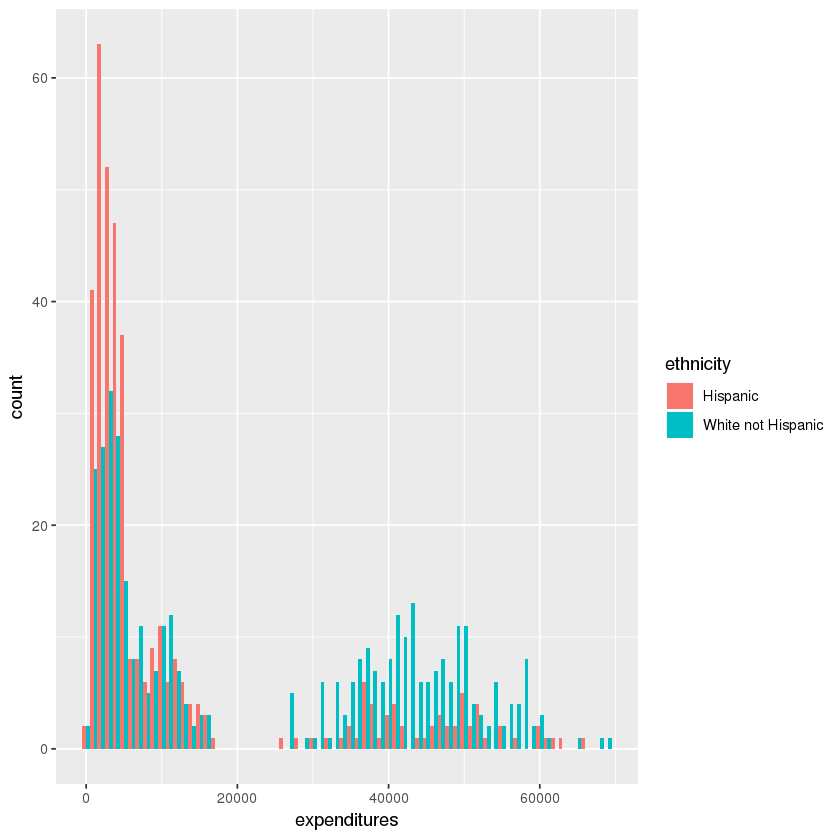

In [19]:
#Create the plot
ggplot(dds.discr.m,aes(x=expenditures,fill=ethnicity))+geom_histogram(binwidth=1000,position='dodge')

Answer (d): Hispanic individuals recieve a LOT less on average than their White counterpart. Like, half as much. However, both the histpanic and white not hispanic histograms are bimodal with the same modes, so there might be something else which is contributiting to the problem.

## Problem 2

Alright, so we shall try to separate out age. (a) Now `group_by` both `age.cohort`and `ethnicity` and `summarize` the mean expenditures. (b) How do the expenditures compare?

#### Solution:

In [23]:
# (a) group_by
dds.discr.m %>% group_by(age.cohort,ethnicity) %>% summarize('mean expenditure'=mean(expenditures))


age.cohort,ethnicity,mean expenditure
0-5,Hispanic,1393.205
0-5,White not Hispanic,1366.900
6-12,Hispanic,2312.187
6-12,White not Hispanic,2052.261
13-17,Hispanic,3955.282
13-17,White not Hispanic,3904.358
18-21,Hispanic,9959.846
18-21,White not Hispanic,10133.058
22-50,Hispanic,40924.116
22-50,White not Hispanic,40187.624


Answer (b): Within each of the groups, there is not much difference between the groups. 

## Problem 3

We shall now visualise this difference, Since we have 1 numeric variable (`expenditures`) and two categorical variables (`age.cohort` and `ethnicity`) we will (a) use side-by-side dot plots (use `geom_jitter`) of `expenditures` by `age.cohort` where the the color is determined by the `ethnicity`. (b) complete the faceted histogram below, so the fill is by `ethnicity` and the faceting is by `age.cohort`.

#### Solution:

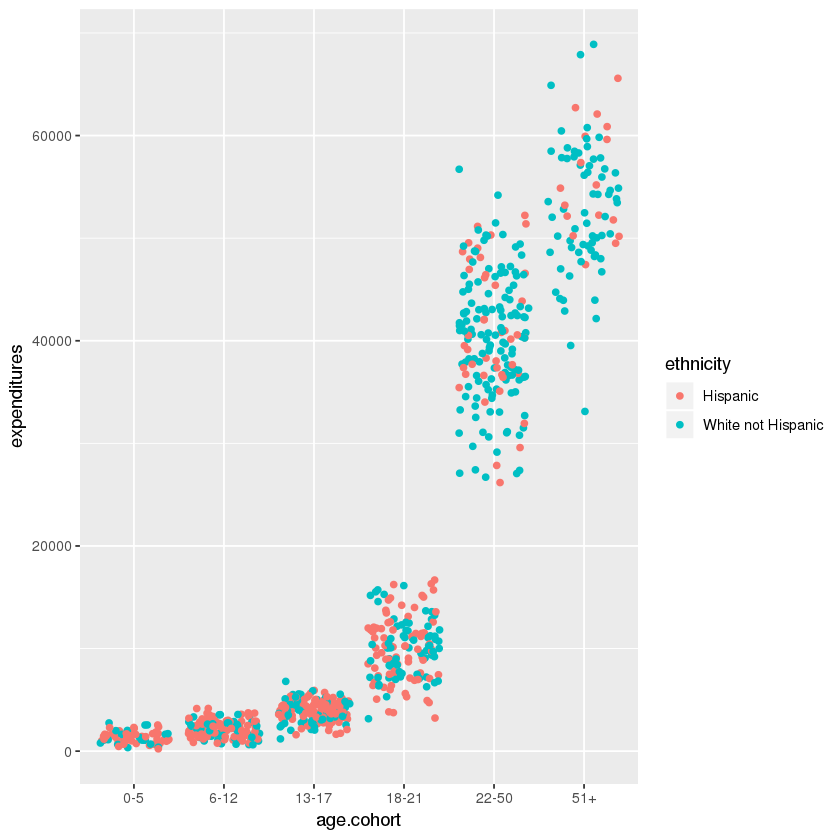

In [24]:
# (a) Jitter Plot Here
ggplot(dds.discr.m,aes(x=age.cohort,y=expenditures,color=ethnicity))+geom_jitter()

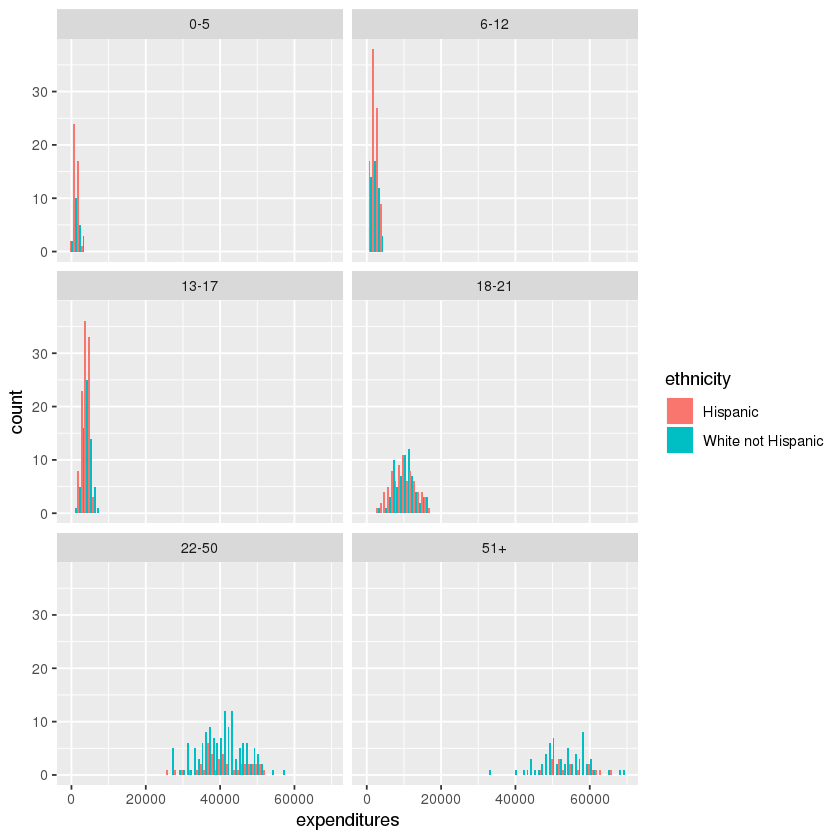

In [25]:
#(b) Complete the plot below
ggplot(dds.discr.m,aes(x=expenditures,fill=ethnicity))+geom_histogram(binwidth=1000,position='dodge')+facet_wrap(~age.cohort,ncol=2,nrow=3)

Answer: 

## Epilogue

We can see from our analysis in problems 2 and 3 that age better explains the difference between expenditures than ethnicity does. This ameliorates the suspicion of discrimination a bit. I (DJK) would argue that this is not the end of the story... it is not unheard of for a secondary factor to be used as a proxy for ethnicity, gender, political part, etc. So one should check the policies to make sure that the treatment of older individuals is in keeping with national standards, and that the treatment rates of groups is consistent with the actual proportions of these groups in the populations at large. But in this case it is a plausible explanation.